In [140]:

import HERA_hack
%load_ext autoreload
%autoreload 2

#these are for the telescope and observation
import numpy as np 
import numpy.linalg as la
import seaborn as sns
import pandas as pd
import os
from scipy import signal
from timeit import default_timer as timer
from scipy.optimize import curve_fit




# #these are only for plotting
# import matplotlib.pyplot as plt
# from matplotlib.ticker import FormatStrFormatter
# import time
# from matplotlib.patches import Ellipse
# import matplotlib.transforms as transforms
# import matplotlib.patches as patches

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Timing: Baselines

In [92]:

dishes = np.array([[0,0],[0,55],[0,60],[2,55],[47,2],[45,23],[56,21],[30,115],[48,52],[100,100],[0,200],[115,30],[33,31],[49,11],[21,24],[25,6],[56,9],[12,13],[16,17],[38,17],[60,14],[26,28],[6,45],[3,37],[12,55],[200,0],[145,13],[134,65],[139,163]])

acorner = np.array([[120,270],[122,280],[120,280],[122,270]])

runtimes_b = []
bls = []
N_antennas = []

for i in range(2,len(dishes)+1): 
    HERA1 = HERA_hack.telescope(dishes[:i], latitude=-30, channel_width=1., Tsys=300, beam_width=3, beam = 'gaussian')
    obs1 = HERA_hack.observation(HERA1, 100, 100, 0.01,acorner, 1, 0.3,norm = True, pbeam = True)
    npix =len(obs1.observable_coordinates())
    imp = (signal.unit_impulse(npix,'mid'))
    timing = np.real(obs1.convolve_map(imp)) 
    runtimes_b.append(timing)
    bls.append(HERA1.N_bls)
    N_antennas.append(obs1.ant_locs.shape[0])

#for some reason the very first run is always longer than the subsequent few. 



[0.04942879600002925,
 0.051692007000383455,
 0.05748910300007992,
 0.05226774600032513,
 0.056354072999965865,
 0.06027932599954511,
 0.05478761900030804,
 0.06138107700007822,
 0.05260550000002695,
 0.0664969019999262,
 0.07064265999997588,
 0.07511820400031866,
 0.07929329000035068,
 0.08745758699933504,
 0.09653029899982357,
 0.09214061200054857,
 0.09616601200013974,
 0.109243888000492,
 0.11895704699963972,
 0.13828208499944594,
 0.157014127000366,
 0.20323430400003417,
 0.21918841800015798,
 0.20601057600015338,
 0.21633024099992326,
 0.2986144249998688,
 0.2658087620002334,
 0.321574063999833]

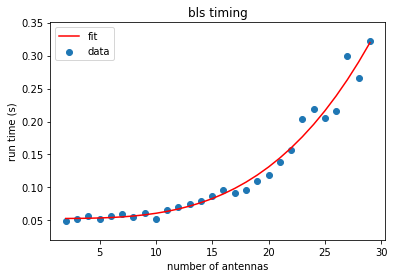

In [141]:

def func_b(x, a,b, c):
     return a * x**b +c 

popt, pcov = curve_fit(func_b, N_antennas, runtimes_b)
        
bls = np.asarray(bls)   
plt.scatter(N_antennas,runtimes_b,label='data')
plt.plot(N_antennas, func_b(N_antennas, *popt), 'r-',label='fit')
plt.title('bls timing')
plt.xlabel('number of antennas')
plt.ylabel('run time (s)')
plt.legend()



In [142]:
#parameter of fit (a,b,c) 
popt

array([3.90979907e-06, 3.30532670e+00, 5.29570193e-02])

array([3.90979907e-06, 3.30532670e+00, 5.29570193e-02])

# Timing: Resolution 

In [134]:
runtimes_r = []
resol = np.linspace(0,1,15)
#resol = np.append(resol,[2,3,4,5])

#here I only used 3 bls so that it woulnd't take forever to run 

for i in range(0,(len(resol)-1)):     
    HERA1 = HERA_hack.telescope(dishes[:3], latitude=-30, channel_width=1., Tsys=300, beam_width=3, beam = 'gaussian')
    obs1 = HERA_hack.observation(HERA1, 100, 100, 0.01,acorner, 1, resol[i],norm = True, pbeam = True)
    npix =len(obs1.observable_coordinates())
    imp = (signal.unit_impulse(npix,'mid'))
    times = np.real(obs1.convolve_map(imp))
    runtimes_r.append(times)

ValueError: Maximum allowed size exceeded

In [132]:
len(resol), len(runtimes_r)

(15, 13)

In [131]:
def func_r(x, a,b, c):
     return a * (1/(x**b)) + c
    
popt_r, pcov_r = curve_fit(func_r, resol ,runtimes_r)

plt.scatter(resol,runtimes_r,label='data')
plt.plot(resol, func_r(resol, *popt_r), 'r-',label='fit')
plt.title('resolution timing')
plt.xlabel('resolution')
plt.ylabel('run time (s)')
plt.legend()





/Users/hannahfronenberg/anaconda2/envs/p37workshop/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


ValueError: operands could not be broadcast together with shapes (15,) (13,) 

In [130]:
#parameter of fit (a,b,c)
popt_r

array([8.29949276e-05, 5.21929022e+00, 3.33095742e-03])

In [ ]:
runtimes_c = []

corner = [260,270,280,290,300,310,320,330,340,350,360]

#here I only used 3 bls and resol 1 so that it woulnd't take forever to run 

for i in range(len(corner)):
    acorner = np.array([[-30,250],[-32,corner[i]],[-30,corner[i]],[-32,250]])
    HERA1 = telescope(dishes[:3], latitude=-30, channel_width=1., Tsys=300, beam_width=3, beam = 'gaussian')
    obs1 = observation(HERA1, 100, 100, 0.01, acorner, 93, 1, 1)
    npix =len(obs1.observable_coordinates())
    imp = (signal.unit_impulse(npix,'mid'))
    times = np.real(obs1.convolve_map(imp))
    runtimes_c.append(times)

In [ ]:
plt.scatter(corner,runtimes_c,label='data')
# plt.plot(resol[2:], func(resol[2:], *popt_r), 'r-',label='fit')
plt.title('resolution timing with sky size')
plt.xlabel('resolution')
plt.ylabel('run time (s)')
plt.gca().invert_xaxis()
plt.legend()
